# Dataset processing

In this notebook we show several methods that can be used to process datasets (currently: `qcodes.DataSet`).

In [1]:
import copy

import qtt
import qtt.utilities.visualization
from qtt.data import plot_dataset
from qtt.data import load_example_dataset

from qtt.dataset_processing import slice_dataset, dataset_dimension, average_dataset, process_dataarray

## Load and plot a dataset

In [2]:
dataset = load_example_dataset('elzerman_detuning_scan/2019-05-28_11-39-39_qtt_generic.json')

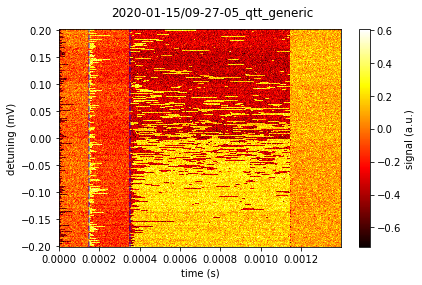

In [3]:
qtt.data.plot_dataset(dataset)
_=qtt.utilities.visualization.plot_vertical_line(150e-6, color='b')
_=qtt.utilities.visualization.plot_vertical_line(350e-6, color='b')

## Slice a dataset

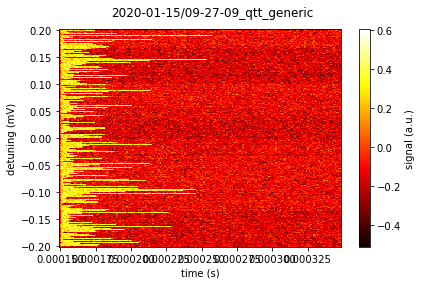

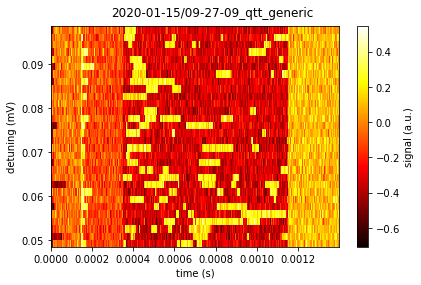

In [4]:
loading_window = slice_dataset(dataset, [150e-6, 350e-6 ], axis=1)
plot_dataset(loading_window, fig=1)

detuning_window = slice_dataset(dataset, [0.05, 0.10 ], axis=0)
plot_dataset(detuning_window, fig=2)

## Average over a dimension

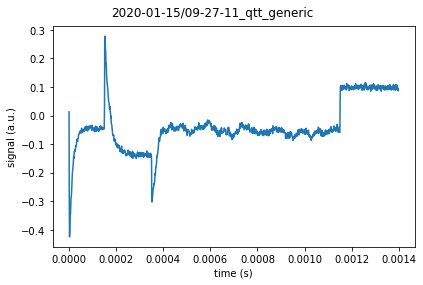

In [5]:
averaged_dataset = average_dataset(dataset, axis=0)
plot_dataset(averaged_dataset)

## Convert to dictionary format

In [6]:
dataset_dictionary=qtt.data.dataset_to_dictionary(averaged_dataset)
print(dataset_dictionary)

{'extra': {'location': '2020-01-15/09-27-11_qtt_generic', '_version': '1.2.1'}, 'metadata': {}, 'arrays': {'signal': {'label': 'signal', 'name': 'signal', 'unit': 'a.u.', 'is_setpoint': False, 'full_name': 'signal', 'array_id': 'signal', 'shape': (1367,), 'ndarray': array([ 0.01288668, -0.29996808, -0.42453639, ...,  0.09534709,
        0.08637174,  0.08866183]), 'set_arrays': ('time',)}, 'time': {'label': 'time', 'name': 'time', 'unit': 's', 'is_setpoint': True, 'full_name': 'time', 'array_id': 'time', 'shape': (1367,), 'ndarray': array([0.00000000e+00, 1.02400054e-06, 2.04800108e-06, ...,
       1.39673671e-03, 1.39776070e-03, 1.39878469e-03]), 'set_arrays': ()}}}


## Process a DataArray

DataSet:
   location = '2020-01-15/09-27-05_qtt_generic'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | detuning       | detuning       | (240,)
   Measured | signal         | signal         | (240, 1367)
   Setpoint | time           | time           | (240, 1367)
   Measured | signal_squared | signal_squared | (240, 1367)


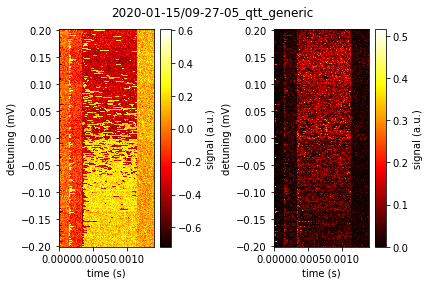

In [7]:
process_dataarray(dataset, 'signal', 'signal_squared', lambda x: x**2)
print(dataset)

plot_dataset(dataset, parameter_names=['signal', 'signal_squared'])

## Differentiate

This currently adds a new DataArray to the dataset. 

DataSet:
   location = '2020-01-15/09-27-05_qtt_generic'
   <Type>   | <array_id>     | <array.name>   | <array.shape>
   Setpoint | detuning       | detuning       | (240,)
   Measured | signal         | signal         | (240, 1367)
   Setpoint | time           | time           | (240, 1367)
   Measured | signal_squared | signal_squared | (240, 1367)
   Measured | diff_dir_y     | diff_dir_y     | (240, 1367)
   Measured | diff_dir_x     | diff_dir_x     | (240, 1367)


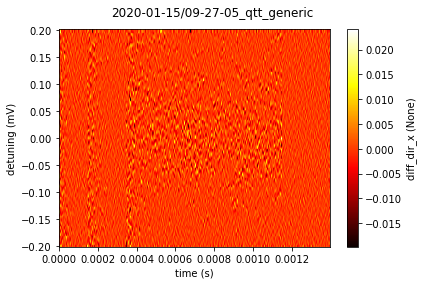

In [8]:
differentiated_dataset = qtt.data.diffDataset(dataset)
qtt.data.diffDataset(differentiated_dataset, 'x')
print(differentiated_dataset)

plot_dataset(differentiated_dataset, parameter_names=['diff_dir_x'])

# Serialization

We can convert a `DataSet` to a plain dictionary and back.

In [9]:
dataset_dictionary = qtt.data.dataset_to_dictionary(dataset)
print(dataset_dictionary)
dataset2 = qtt.data.dictionary_to_dataset(dataset_dictionary)

{'extra': {'location': '2020-01-15/09-27-05_qtt_generic', '_version': '1.2.1'}, 'metadata': {}, 'arrays': {'detuning': {'label': 'detuning', 'name': 'detuning', 'unit': 'mV', 'is_setpoint': True, 'full_name': 'detuning', 'array_id': 'detuning', 'shape': (240,), 'ndarray': array([-0.2       , -0.19832636, -0.19665273, -0.19497909, -0.19330543,
       -0.19163179, -0.18995816, -0.18828452, -0.18661088, -0.18493724,
       -0.1832636 , -0.18158996, -0.17991632, -0.17824268, -0.17656904,
       -0.17489539, -0.17322175, -0.17154811, -0.16987447, -0.16820084,
       -0.1665272 , -0.16485356, -0.16317992, -0.16150628, -0.15983264,
       -0.158159  , -0.15648535, -0.15481171, -0.15313807, -0.15146443,
       -0.14979079, -0.14811715, -0.14644352, -0.14476988, -0.14309624,
       -0.1414226 , -0.13974896, -0.13807531, -0.13640167, -0.13472803,
       -0.13305439, -0.13138075, -0.12970711, -0.12803347, -0.12635984,
       -0.12468619, -0.12301255, -0.12133891, -0.11966527, -0.11799163,
       